# Summary

Download PubMed (MedLine) XML files from the NCBI website.

(using the browser plugin leads to pretty good speeds?!)

> **Note:**
>
> At the moment, saving to Apache Parquet files leads to a crash at some point.

# Imports

In [1]:
%run _imports.ipynb

Setting the PYTHON_VERSION environment variable.
Setting the SPARK_MASTER environment variable.
Setting the DB_TYPE environment variable.
Setting the DB_PORT environment variable.


2017-12-20 12:10:12.554131


In [2]:
import pmc_tables

In [3]:
NOTEBOOK_NAME = 'load_pubmed_xml_files'
os.makedirs(NOTEBOOK_NAME, exist_ok=True)

In [4]:
sorted(os.listdir('../downloads/ncbi/pubmed/baseline/'))[:10]

['README.txt',
 'medline17n0001.xml.gz',
 'medline17n0001.xml.gz.md5',
 'medline17n0002.xml.gz',
 'medline17n0002.xml.gz.md5',
 'medline17n0003.xml.gz',
 'medline17n0003.xml.gz.md5',
 'medline17n0004.xml.gz',
 'medline17n0004.xml.gz.md5',
 'medline17n0005.xml.gz']

# Demo

In [5]:
# html_table

html_table = """\
<table frame="box" rules="groups">
  <thead>
    <tr>
      <th align="left" valign="top" rowspan="1" colspan="1">Variable</th>
      <th align="center" valign="top" rowspan="1" colspan="1">Enrolled in study (n = 1319)</th>
      <th align="center" valign="top" rowspan="1" colspan="1">Did not Enroll (n = 461)</th>
      <th align="center" valign="top" rowspan="1" colspan="1">Test Statistic</th>
      <th align="center" valign="top" rowspan="1" colspan="1">p-value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Treatment Assignment</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Circumcision</td>
      <td align="center" valign="top" rowspan="1" colspan="1">622 (47)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">266 (58)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">15.2</td>
      <td align="center" valign="top" rowspan="1" colspan="1">&lt; 0.001</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Control</td>
      <td align="center" valign="top" rowspan="1" colspan="1">697 (53)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">195 (42)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Age</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    18-20</td>
      <td align="center" valign="top" rowspan="1" colspan="1">600 (46)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">185 (41)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">3.6</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.03</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    21-24</td>
      <td align="center" valign="top" rowspan="1" colspan="1">700 (54)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">266 (59)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Education</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Primary (0-8)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">455 (34)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">191 (41)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">7.2</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.03</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Secondary (9-12)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">761 (58)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">236 (51)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Post-Secondary (13 or more)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">103 (8)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">34 (7)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Employment Status</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Employed</td>
      <td align="center" valign="top" rowspan="1" colspan="1">94 (7)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">43 (9)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">8.4</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.02</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Self-Employed</td>
      <td align="center" valign="top" rowspan="1" colspan="1">338 (26)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">142 (31)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Unemployed</td>
      <td align="center" valign="top" rowspan="1" colspan="1">887 (67)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">276 (60)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Occupation</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Farm laborer/Fisherman</td>
      <td align="center" valign="top" rowspan="1" colspan="1">119 (9)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">33 (7)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">11.2</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.05</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Professional/Managerial</td>
      <td align="center" valign="top" rowspan="1" colspan="1">9 (&lt;1)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">10 (2)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Semi-skilled worker</td>
      <td align="center" valign="top" rowspan="1" colspan="1">78 (6)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">33 (7)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Skilled Worker</td>
      <td align="center" valign="top" rowspan="1" colspan="1">92 (7)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">40 (9)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Student</td>
      <td align="center" valign="top" rowspan="1" colspan="1">293 (22)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">94 (20)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Unskilled Worker</td>
      <td align="center" valign="top" rowspan="1" colspan="1">728 (55)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">251 (54)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Income</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    2000 ksh/month or less</td>
      <td align="center" valign="top" rowspan="1" colspan="1">702 (53)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">230 (50)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">1.3</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.25</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    More than 2000 ksh/month</td>
      <td align="center" valign="top" rowspan="1" colspan="1">616 (46)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">231 (50)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Marital Status</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Married</td>
      <td align="center" valign="top" rowspan="1" colspan="1">72 (5)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">30 (7)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.68</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.40</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Single</td>
      <td align="center" valign="top" rowspan="1" colspan="1">1246 (95)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">431 (93)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Lifetime Sex Partners<xref ref-type="table-fn" rid="TFN1">*</xref></td>
      <td align="center" valign="top" rowspan="1" colspan="1">Median</td>
      <td align="center" valign="top" rowspan="1" colspan="1">Median</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1">4.0</td>
      <td align="center" valign="top" rowspan="1" colspan="1">4.0</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.01</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.95</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1">IQR 1-7</td>
      <td align="center" valign="top" rowspan="1" colspan="1">IQR: 1-7</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Number of Sex Partners last 6 months</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    None</td>
      <td align="center" valign="top" rowspan="1" colspan="1">141 (11)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">53 (11)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.53</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.77</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    One</td>
      <td align="center" valign="top" rowspan="1" colspan="1">577 (44)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">207 (45)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    More than one</td>
      <td align="center" valign="top" rowspan="1" colspan="1">598 (45)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">201 (44)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">Diagnosed with a STI at baseline</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    Yes</td>
      <td align="center" valign="top" rowspan="1" colspan="1">114 (9)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">37 (8)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.17</td>
      <td align="center" valign="top" rowspan="1" colspan="1">0.68</td>
    </tr>
    <tr>
      <td align="left" valign="top" rowspan="1" colspan="1">    No</td>
      <td align="center" valign="top" rowspan="1" colspan="1">1205 (91)</td>
      <td align="center" valign="top" rowspan="1" colspan="1">424 (92)</td>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
      <td align="center" valign="top" rowspan="1" colspan="1"/>
    </tr>
  </tbody>
</table>
"""

# Get growth statistics

In [5]:
pubmed_xml_files = (
    sorted(glob.glob('../downloads/ncbi/pubmed/baseline/*.xml.gz')) + 
    sorted(glob.glob('../downloads/ncbi/pubmed/updatefiles/*.xml.gz'))
)

In [6]:
len(pubmed_xml_files)

1398

In [7]:
def worker(filename):
    data = pmc_tables.extern.parse_pubmed_xml_file(filename)
    df = pd.DataFrame(data)
    df_kept = df[['pmid', 'year_published', 'pmc']]
    return df_kept

## Calculate first half

In [9]:
with concurrent.futures.ProcessPoolExecutor(32) as p:
    results = list(p.map(worker, pubmed_xml_files[:700]))

In [10]:
results1 = results

In [12]:
results1_df = pd.concat(results1, ignore_index=True)

In [13]:
# results1_df.to_parquet(f'{NOTEBOOK_NAME}/results1.parquet')

## Calculate second half

In [ ]:
with concurrent.futures.ProcessPoolExecutor(32) as p:
    results = list(p.map(worker, pubmed_xml_files[700:]))

In [ ]:
results2 = results

In [ ]:
results2_df = pd.concat(results2, ignore_index=True)

In [ ]:
# results2_df.to_parquet(f'{NOTEBOOK_NAME}/results2.parquet')

## Merge results

In [27]:
results1_df = pd.read_parquet(f'{NOTEBOOK_NAME}/results1.parquet')

In [28]:
results2_df = pd.read_parquet(f'{NOTEBOOK_NAME}/results2.parquet')

In [29]:
results_df = pd.concat([results1_df, results2_df], ignore_index=True)

In [30]:
results_df.to_parquet(f'{NOTEBOOK_NAME}/results_all.parquet')

## Clean data

In [32]:
df = pd.read_parquet(f'{NOTEBOOK_NAME}/results_all.parquet')

In [34]:
display(df.head())
print(len(df))

,pmid,year_published,pmc
0,1.0,1975.0,None
1,2.0,1975.0,None
2,4.0,1975.0,None
3,5.0,1975.0,None
4,3.0,1975.0,None


35255341


In [35]:
df = df.dropna(subset=['pmid'])
print(len(df))

35255071


In [36]:
df = df.drop_duplicates(subset=['pmid'])
print(len(df))

27961268


In [37]:
df = df.dropna(subset=['year_published'])
print(len(df))

25928344


In [ ]:
table = pa.Table.from_pandas(df)

In [41]:
pq.write_table(table, f'{NOTEBOOK_NAME}/results_all_cleaned.parquet')

# Make plots

## Load data

In [8]:
df = pq.read_table(f'{NOTEBOOK_NAME}/results_all_cleaned.parquet').to_pandas()

In [9]:
display(df.head())
print(len(df))

,pmid,year_published,pmc
0,1.0,1975.0,None
1,2.0,1975.0,None
2,4.0,1975.0,None
3,5.0,1975.0,None
4,3.0,1975.0,None


25928344


## PMC open access ids

In [29]:
pmc_open_access_pickle = Path(f'{NOTEBOOK_NAME}/pmc_open_access_ids.pickle')

if pmc_open_access_pickle.is_file():
    with pmc_open_access_pickle.open('rb') as fin:
        pmc_open_access_ids = pickle.load(fin)
else:
    pmc_open_access_archives = list(Path('download/pmc_archives/').glob('*/*/*.zip'))
    pmc_open_access_ids = {p.stem for p in pmc_open_access_archives}
    with pmc_open_access_pickle.open('wb') as fout:
        pmc_open_access_ids = pickle.dump(pmc_open_access_ids, fout, pickle.HIGHEST_PROTOCOL)

In [32]:
print(next(iter(pmc_open_access_ids)))
print(len(pmc_open_access_ids))

PMC4061807
2396222


## Group by year

In [33]:
grps = df.groupby('year_published')

In [35]:
stats = []

for year, grp in tqdm.tqdm_notebook(grps, total=len(grps)):
    grp_with_pmc = grp[grp['pmc'].notnull()]
    grp_with_pmc_oa = grp_with_pmc[grp_with_pmc['pmc'].isin(pmc_open_access_ids)]
    stats.append((year, len(grp), len(grp_with_pmc), len(grp_with_pmc_oa)))

HBox(children=(IntProgress(value=0, max=215), HTML(value='')))

## Draw

In [41]:
stats_df = pd.DataFrame(stats, columns=['year', 'num_pubmed', 'num_pmc', 'num_pmc_oa'])
stats_df['year'] = stats_df['year'].astype(int)
stats_df = stats_df.sort_values('year')

In [42]:
stats_df.head()

,year,num_pubmed,num_pmc,num_pmc_oa
0,1781,69,0,0
1,1785,43,0,0
2,1786,60,0,0
3,1787,43,0,0
4,1788,33,0,0


In [67]:
print('{:,d}'.format(stats_df['num_pubmed'].sum()))

25,928,344


In [68]:
print('{:,d}'.format(stats_df['num_pmc'].sum()))

3,747,657


In [69]:
3747657 /25928344

0.14453900333935712

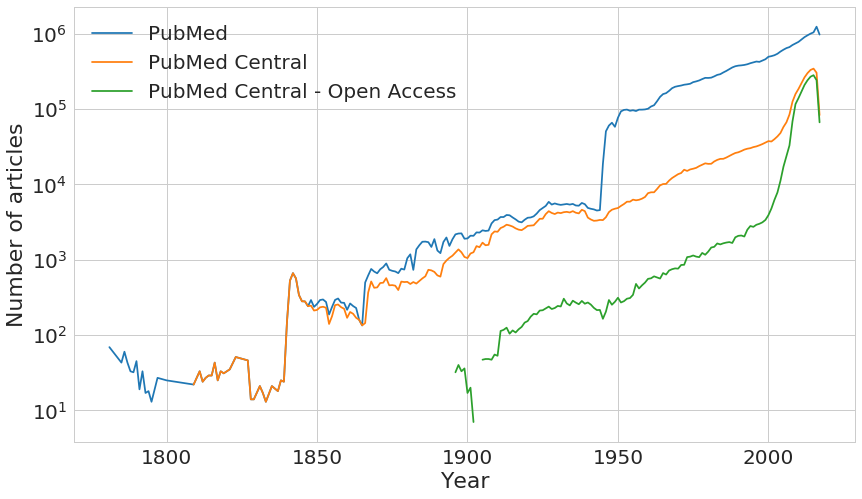

In [64]:
fg, axes = plt.subplots(figsize=(14, 8))

# Ignore 2018 because very few papers are available then
df = stats_df[stats_df['year'] < 2018]

plt.semilogy(df['year'], df['num_pubmed'], label='PubMed')
plt.semilogy(df['year'], df['num_pmc'], label='PubMed Central')
plt.semilogy(df['year'], df['num_pmc_oa'], label='PubMed Central - Open Access')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of articles")

plt.savefig(f"{NOTEBOOK_NAME}/number_of_articles_published_vs_year.pdf", bbox_inches='tight')
plt.savefig(f"{NOTEBOOK_NAME}/number_of_articles_published_vs_year.png", dpi=300, bbox_inches='tight')

# Set up

In [ ]:
def df_to_table(df, integer_columns=None, integer_dtypes=None):
    """
    """
    extra_columns = {}
    for column, dtype in zip(integer_columns, integer_dtypes):
        extra_columns[column] = {
            'dtype': dtype,
            'idx': list(df.columns).index(column),
            'data': df[column]
        }

    table = pa.Table.from_pandas(
        df[[c for c in df.columns if c not in integer_columns]],
        preserve_index=False)
    
    for column_name, column_attrib in sorted(extra_columns.items(), key=lambda c: c[1]['idx']):
        array = pa.Array.from_pandas(
            column_attrib['data'], column_attrib['data'].isnull(), column_attrib['dtype'])
        column = pa.Column.from_array(column_name, array)
        table = table.add_column(column_attrib['idx'], column)
        
    return table

# Process XML files

In [ ]:
files_to_import = (
    sorted(glob.glob('../downloads/ncbi/pubmed/baseline/*.xml.gz')) + 
    sorted(glob.glob('../downloads/ncbi/pubmed/updatefiles/*.xml.gz'))
)
    

for i, filename in enumerate(tqdm.tqdm_notebook(files_to_import, total=len(files_to_import))):
    basename = op.basename(filename)[:-7]
    # print(filename, flush=True)
    
    data = pmc_tables.extern.parse_pubmed_xml_file(filename)

    df = pd.DataFrame(data)
    df['basename'] = basename
    
    table = df_to_table(df, ['year_published'], [pa.int16()])
    # print(table.schema)

    if i == 0:
        writer = pq.ParquetWriter(f'{NOTEBOOK_NAME}/pubmed.parquet', table.schema, flavor='spark')
      
    writer.write_table(table)
    
writer.close()

HBox(children=(IntProgress(value=0, max=1398), HTML(value='')))

In [ ]:
!ls {NOTEBOOK_NAME} -lSh